## Extração


In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [ ]:
df_inicial = requests.get(url)
df_text = json.loads(df_inicial.text)
df = pd.json_normalize(df_text, sep='.')

**Dicionário de dados**
- customerID: número de identificação único de cada cliente
- Churn: se o cliente deixou ou não a empresa
- gender: gênero (masculino e feminino)
- SeniorCitizen: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
- Partner: se o cliente possui ou não um parceiro ou parceira
- Dependents: se o cliente possui ou não dependentes
- tenure: meses de contrato do cliente
- PhoneService: assinatura de serviço telefônico
- MultipleLines: assisnatura de mais de uma linha de telefone
- InternetService: assinatura de um provedor internet
- OnlineSecurity: assinatura adicional de segurança online
- OnlineBackup: assinatura adicional de backup online
- DeviceProtection: assinatura adicional de proteção no dispositivo
- TechSupport: assinatura adicional de suporte técnico, menos tempo de espera
- StreamingTV: assinatura de TV a cabo
- StreamingMovies: assinatura de streaming de filmes
- Contract: tipo de contrato
- PaperlessBilling: se o cliente prefere receber online a fatura
- PaymentMethod: forma de pagamento
- Charges.Monthly: total de todos os serviços do cliente por mês
- Charges.Total: total gasto pelo cliente

In [ ]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

1. **Customer.SeniorCitizen:** Inteiro ao invés de bool
2. **Total:** Object ao invés de float

In [ ]:
# Contar o número de duplicatas
num_duplicados = df.duplicated().sum()
print(f"Número de duplicatas: {num_duplicados}")

Número de duplicatas: 0


In [ ]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

## Transformação

In [ ]:
colunas_strings = ['Churn','customer.gender', 'customer.Partner', 'customer.Dependents',
                   'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
                   	'internet.OnlineSecurity', 'internet.OnlineBackup','internet.DeviceProtection',
                   'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                   'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

for col in colunas_strings:
    df[col] = df[col].str.lower()


In [ ]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
df['Contas_Diarias'] = df['account.Charges.Monthly'] / 30
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40,2.796667


In [ ]:
colunas_yes_no = ['Churn', 'customer.Partner','customer.Dependents', 'phone.PhoneService',
                  'phone.MultipleLines', 'internet.OnlineSecurity','internet.OnlineBackup',
                  'internet.DeviceProtection','internet.TechSupport',	'internet.StreamingTV',
                  'internet.StreamingMovies', 'account.PaperlessBilling']

In [ ]:
for col_yes in colunas_yes_no:
  df[col_yes] = df[col_yes].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
df[colunas_yes_no] = df[colunas_yes_no].astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   int64  
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   int64  
 5   customer.Dependents        7267 non-null   int64  
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   int64  
 8   phone.MultipleLines        7267 non-null   int64  
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   int64  
 11  internet.OnlineBackup      7267 non-null   int64  
 12  internet.DeviceProtection  7267 non-null   int64  
 13  internet.TechSupport       7267 non-null   int64

In [ ]:
df.rename(columns={'Churn': 'Evasao', 'customer.gender': 'cliente.Genero',
                   'customer.SeniorCitizen':'cliente.CidadaoIdoso',
                   'customer.Partner':'cliente.Parceiro', 'customer.Dependents':'cliente.Dependentes',
                   'customer.tenure': 'cliente.MesesContrato', 'phone.PhoneService': 'telefone.ServicoTelefone',
                   'phone.MultipleLines': 'telefone.VariasLinhas', 'internet.InternetService': 'internet.ServicoInternet',
                   'internet.OnlineSecurity':'internet.SegurancaOnline','internet.DeviceProtection':'internet.ProtecaoDispositivos',
                   'internet.TechSupport': 'internet.SuporteTecnico',   'internet.StreamingMovies':'internet.StreamingFilmes',
                   'account.Contract': 'conta.Contrato', 'account.PaperlessBilling':'conta.FaturamentoEletronico',
                   'account.PaymentMethod': 'conta.MetodoPagamento','account.Charges.Monthly':'conta.Cobrancas.Mensal',
                   'account.Charges.Total': 'conta.Cobrancas.Total'}, inplace=True)

In [ ]:
df.head()

,customerID,Evasao,cliente.Genero,cliente.CidadaoIdoso,cliente.Parceiro,cliente.Dependentes,cliente.MesesContrato,telefone.ServicoTelefone,telefone.VariasLinhas,internet.ServicoInternet,...,internet.ProtecaoDispositivos,internet.SuporteTecnico,internet.StreamingTV,internet.StreamingFilmes,conta.Contrato,conta.FaturamentoEletronico,conta.MetodoPagamento,conta.Cobrancas.Mensal,conta.Cobrancas.Total,Contas_Diarias
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.796667


## Carga e análise

In [ ]:
df.describe()

,Evasao,cliente.CidadaoIdoso,cliente.Parceiro,cliente.Dependentes,cliente.MesesContrato,telefone.ServicoTelefone,telefone.VariasLinhas,internet.SegurancaOnline,internet.OnlineBackup,internet.ProtecaoDispositivos,internet.SuporteTecnico,internet.StreamingTV,internet.StreamingFilmes,conta.FaturamentoEletronico,conta.Cobrancas.Mensal,conta.Cobrancas.Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.157337
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,1.004319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.180833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.343333
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.995833
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


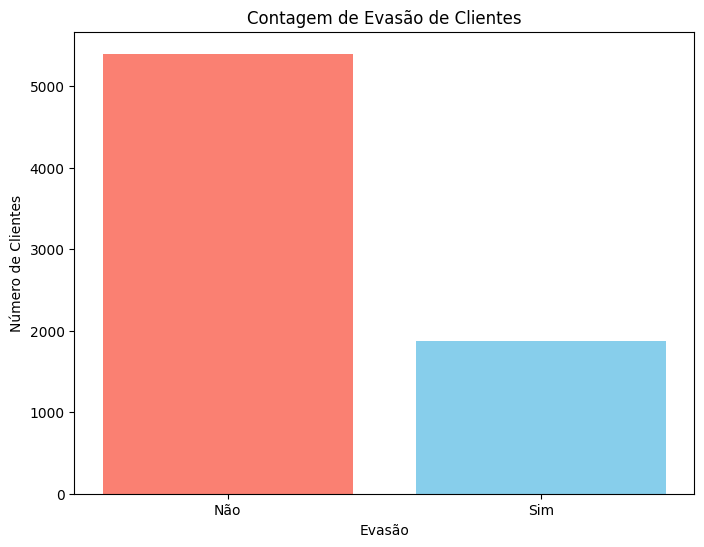

In [ ]:
evasao_counts = df['Evasao'].value_counts()

fig_evasao, ax_evasao = plt.subplots(figsize=(8, 6))
ax_evasao.bar(evasao_counts.index, evasao_counts.values, color=['salmon','skyblue'])

ax_evasao.set_title('Contagem de Evasão de Clientes')
ax_evasao.set_xlabel('Evasão')
ax_evasao.set_ylabel('Número de Clientes')
ax_evasao.set_xticks([0, 1])
ax_evasao.set_xticklabels(['Não', 'Sim'])

plt.show()

In [ ]:
evasao_genero = df.groupby('cliente.Genero')['Evasao'].sum()
evasao_tipo_contrato = df.groupby('conta.Contrato')['Evasao'].sum()
evasao_metodo_pagamento = df.groupby('conta.MetodoPagamento')['Evasao'].sum()
evasao_dependentes = df.groupby('cliente.Dependentes')['Evasao'].sum()

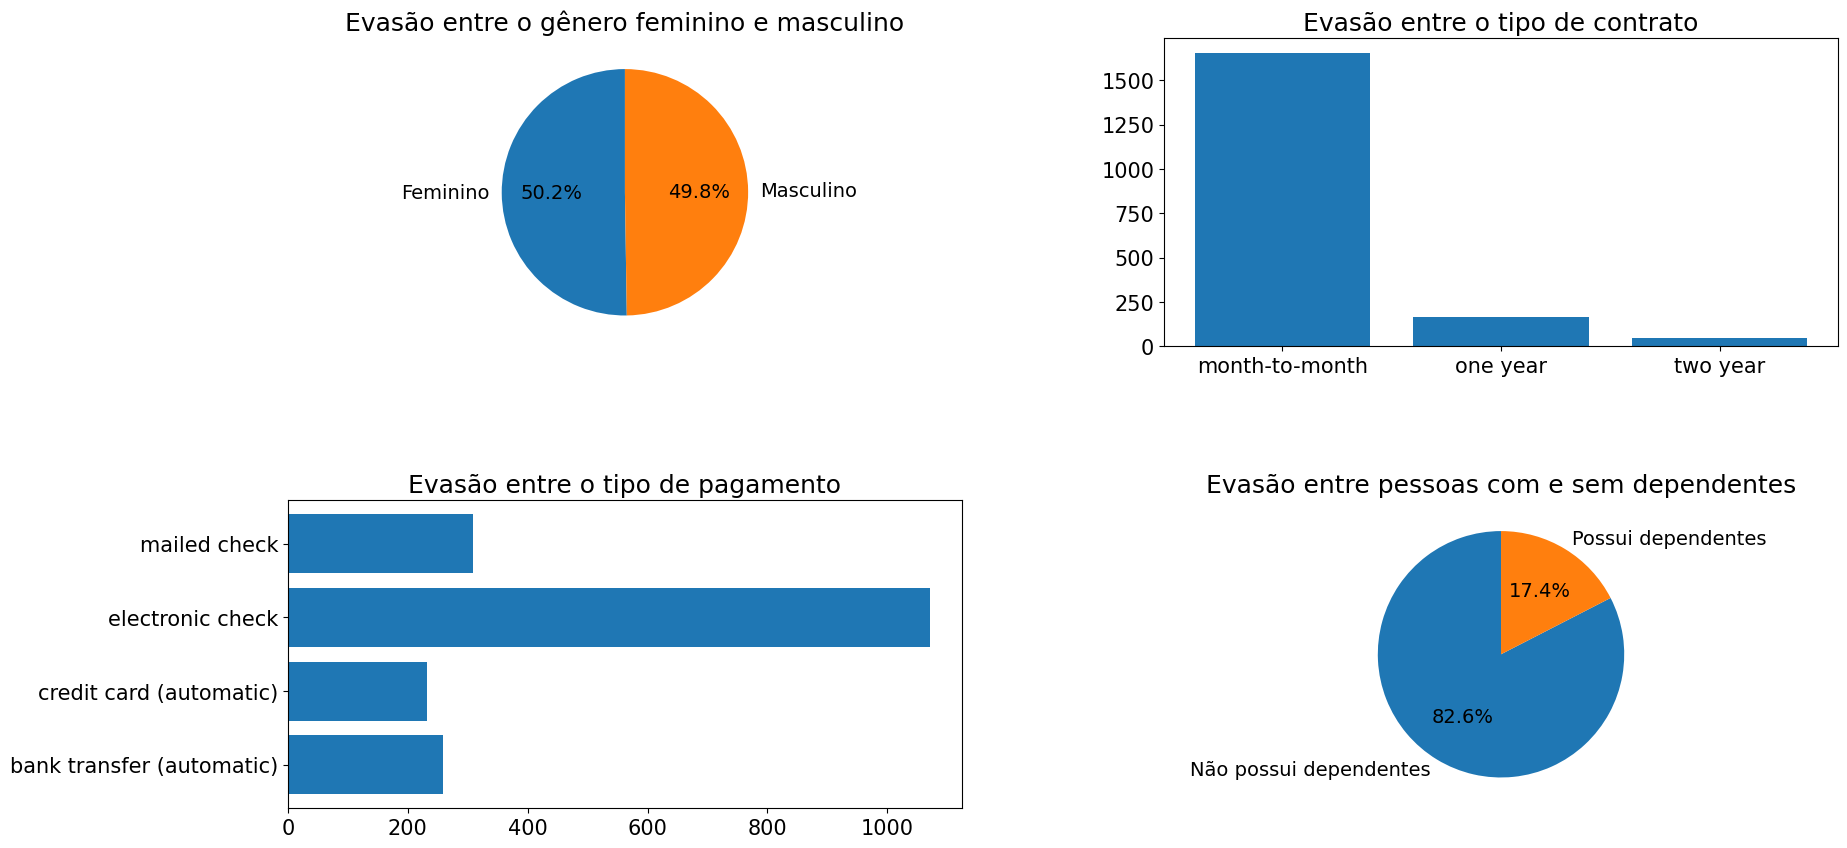

In [ ]:
fig_categorias, axs_categorias = plt.subplots(2,2, figsize=(20,10))
fig_categorias.subplots_adjust(hspace=0.5,wspace=0.3)
labels_genero = ['Feminino', 'Masculino']
labels_dependentes = ['Não possui dependentes','Possui dependentes']

axs_categorias[0,0].pie(evasao_genero,labels=labels_genero, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axs_categorias[0,0].set_title('Evasão entre o gênero feminino e masculino', fontsize=18)

axs_categorias[0,1].bar(evasao_tipo_contrato.index, evasao_tipo_contrato.values)
axs_categorias[0,1].set_title('Evasão entre o tipo de contrato', fontsize=18)

axs_categorias[1,0].barh(evasao_metodo_pagamento.index, evasao_metodo_pagamento.values)
axs_categorias[1,0].set_title('Evasão entre o tipo de pagamento', fontsize=18)

axs_categorias[1,1].pie(evasao_dependentes, labels=labels_dependentes, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
axs_categorias[1,1].set_title('Evasão entre pessoas com e sem dependentes', fontsize=18)

for ax in axs_categorias.flat:
  ax.xaxis.set_tick_params(labelsize=15)
  ax.yaxis.set_tick_params(labelsize=15)


plt.show()

In [ ]:
evasao_idosos = df.groupby('cliente.CidadaoIdoso')['Evasao'].sum()

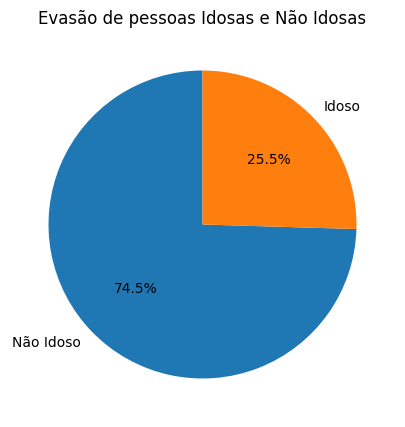

In [ ]:
fig_idoso, ax_idoso = plt.subplots(figsize=(10,5))
labels_idoso = ['Não Idoso', 'Idoso']

ax_idoso.pie(evasao_idosos, labels=labels_idoso, autopct='%1.1f%%', startangle=90)
ax_idoso.set_title('Evasão de pessoas Idosas e Não Idosas')


plt.show()

In [ ]:
evasao_tempo_contrato = df.groupby('cliente.MesesContrato')['Evasao'].sum()
evasao_cobranca_total = df.groupby('conta.Cobrancas.Total')['Evasao'].sum()

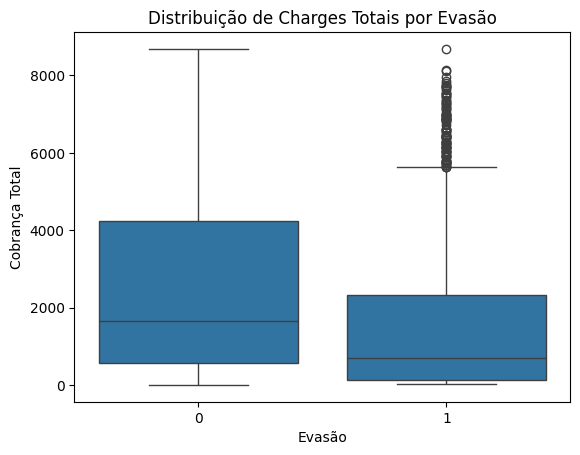

In [ ]:
sns.boxplot(x='Evasao', y='conta.Cobrancas.Total', data=df)
plt.title('Distribuição de Charges Totais por Evasão')
plt.xlabel('Evasão')
plt.ylabel('Cobrança Total')
plt.show()

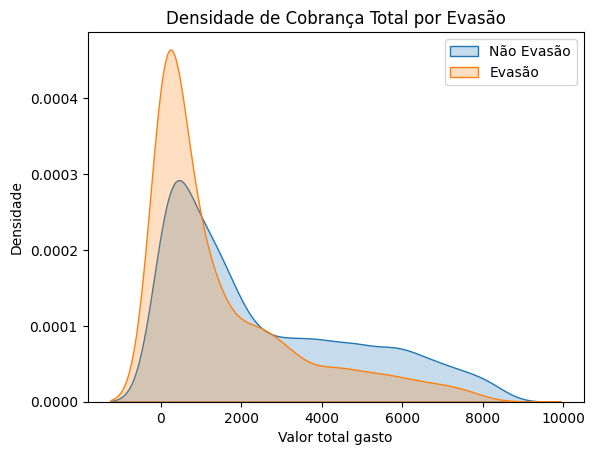

In [ ]:
sns.kdeplot(data=df[df['Evasao'] == 0]['conta.Cobrancas.Total'], label='Não Evasão', fill=True)
sns.kdeplot(data=df[df['Evasao'] == 1]['conta.Cobrancas.Total'], label='Evasão', fill=True)
plt.title('Densidade de Cobrança Total por Evasão')
plt.xlabel('Valor total gasto')
plt.ylabel('Densidade')
plt.legend()

plt.show()


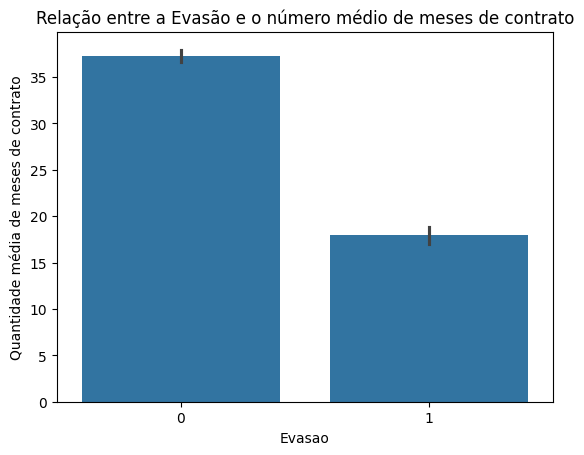

In [ ]:
sns.barplot(x='Evasao', y='cliente.MesesContrato', data=df, estimator=np.mean)
plt.ylabel('Quantidade média de meses de contrato')
plt.title('Relação entre a Evasão e o número médio de meses de contrato')


plt.show()

In [ ]:
colunas_servicos_binarios = [
    'telefone.ServicoTelefone', 'telefone.VariasLinhas',
    'internet.SegurancaOnline', 'internet.OnlineBackup',
    'internet.ProtecaoDispositivos', 'internet.SuporteTecnico',
    'internet.StreamingTV', 'internet.StreamingFilmes'
]

df['Quantidades_Servicos'] = df[colunas_servicos_binarios].sum(axis=1)

display(df[['customerID', 'Quantidades_Servicos']].head())

,customerID,Quantidades_Servicos
0,0002-ORFBO,4
1,0003-MKNFE,3
2,0004-TLHLJ,2
3,0011-IGKFF,5
4,0013-EXCHZ,3


In [ ]:
df[['Evasao', 'Quantidades_Servicos']].corr()

,Evasao,Quantidades_Servicos
Evasao,1.000000,-0.064642
Quantidades_Servicos,-0.064642,1.000000


## Relatório final

# Relatório de Análise de Evasão de Clientes

## Introdução

O objetivo desta análise é investigar os principais fatores que levam à evasão de clientes (Churn) em uma empresa de telecomunicações. A evasão de clientes é um problema crítico para qualquer negócio, pois impacta diretamente a receita e a sustentabilidade da empresa. Compreender os motivos que levam os clientes a cancelar seus serviços é fundamental para desenvolver estratégias de retenção eficazes e melhorar a satisfação do cliente.

## Limpeza e Tratamento de Dados

Para preparar os dados para a análise, foram realizados os seguintes passos:

1.  **Importação dos Dados:** Os dados foram importados de um arquivo JSON e convertidos em um DataFrame do pandas.
2.  **Tratamento de Dados Faltantes:** A coluna `account.Charges.Total` continha valores vazios que foram preenchidos com 0 para evitar erros em cálculos futuros.
3.  **Conversão de Tipos de Dados:** A coluna `account.Charges.Total` foi convertida para o tipo numérico (float) para permitir cálculos e análises estatísticas. As colunas com respostas "sim" e "não" foram convertidas para o formato binário (1 e 0) para facilitar a análise.
4.  **Padronização de Strings:** Todas as strings nas colunas categóricas foram convertidas para letras minúsculas para garantir a consistência dos dados.
5.  **Renomeação de Colunas:** As colunas foram renomeadas para nomes mais descritivos e em português para facilitar a interpretação dos dados.

## Análise Exploratória de Dados

A análise exploratória dos dados revelou diversos padrões e tendências relacionados à evasão de clientes:

*   **Evasão por Tipo de Contrato:** O gráfico de barras mostrou que a grande maioria dos clientes que cancelaram o serviço possuía um contrato do tipo "mês a mês". Isso sugere que a falta de um compromisso de longo prazo é um fator de risco significativo para a evasão.

*   **Evasão por Método de Pagamento:** Clientes que utilizam "cheque eletrônico" como método de pagamento apresentaram uma taxa de evasão notavelmente maior em comparação com outros métodos, como transferência bancária e cartão de crédito.

*   **Evasão por Dependentes:** A análise mostrou que clientes sem dependentes têm uma probabilidade maior de cancelar o serviço. Isso pode indicar que famílias com dependentes valorizam mais a estabilidade dos serviços de telecomunicações.

*   **Evasão por Cobranças Mensais:** O histograma de cobranças mensais indicou que clientes com cobranças mais altas tendem a ter uma taxa de evasão maior, sugerindo que o custo do serviço é um fator importante na decisão de cancelar.

## Conclusões e Insights

A análise dos dados permitiu extrair os seguintes insights:

*   **Flexibilidade Contratual:** A flexibilidade dos contratos "mês a mês" é uma faca de dois gumes: embora atraia clientes, também facilita o cancelamento.
*   **Experiência de Pagamento:** O método de pagamento por "cheque eletrônico" pode estar associado a uma experiência de pagamento menos conveniente.
*   **Perfil do Cliente:** Clientes sem dependentes e com cobranças mensais mais altas representam um segmento de maior risco para a evasão.

## Recomendações

Com base nos insights obtidos, as seguintes recomendações podem ajudar a reduzir a evasão de clientes:

1.  **Incentivar Contratos de Longo Prazo:** Oferecer descontos, benefícios exclusivos ou pacotes mais vantajosos para clientes que optarem por contratos de um ou dois anos.
2.  **Melhorar a Experiência de Pagamento:** Investigar os motivos da alta evasão entre os usuários de "cheque eletrônico" e incentivar a migração para métodos de pagamento automáticos, oferecendo descontos ou outros benefícios.
3.  **Criar Ofertas Personalizadas:** Desenvolver pacotes e ofertas especiais para clientes sem dependentes, com foco em custo-benefício e flexibilidade, para aumentar a percepção de valor.
4.  **Revisar a Estratégia de Preços:** Avaliar a estrutura de preços e considerar a criação de pacotes mais acessíveis ou com melhor custo-benefício para clientes sensíveis ao preço.